In [1]:
import time
import random
from math import ceil
from decimal import Decimal
from typing import List, Tuple

import random
from sympy import Symbol, Poly


# Use a large prime as the modulus for arithmetic operations
prime: int = 15485867
threshold: int = 5
secret1: int = 1234
secret2: int = 4321
secret3: int = 3333

In [2]:
# Client-side
# All parties use the same prime and same threshold
def sample_shamir_polynomial(zero_value: int) -> List[int]:
    coefs = [zero_value] + [random.randrange(prime) for _ in range(threshold - 1)]
    return coefs

In [3]:
# Client-side
def evaluate_at_point(coefs: List[int], point: int) -> int:
    result = 0
    for coef in reversed(coefs):
        result = (coef + point * result) % prime
    return result

In [4]:
# Server-side
def interpolate_at_point(points_values: List[Tuple[int, int]], query_x_axis: int) -> int:
    x_vals, y_vals = zip(*points_values)
    constants = lagrange_constants_for_point(x_vals, query_x_axis)
    return sum(ci * vi for ci, vi in zip(constants, y_vals)) % prime

In [5]:
# Server-side
def lagrange_constants_for_point(points: List[int], query_x_axis: int) -> List[int]:
    constants = [0] * len(points)
    for i in range(len(points)):
        xi = points[i]
        num = 1
        denum = 1
        for j in range(len(points)):
            if j != i:
                xj = points[j]
                num = (num * (xj - query_x_axis)) % prime
                denum = (denum * (xj - xi)) % prime
        constants[i] = (num * pow(denum, -1, prime)) % prime
    return constants

In [6]:
# Client-side
def shamir_share(secret: int, num_shares: int) -> List[Tuple[int, int]]:
    polynomial = sample_shamir_polynomial(secret)
    shares = [(i, evaluate_at_point(polynomial, i)) for i in range(1, num_shares + 1)]
    return shares, polynomial

In [7]:
shares1, coeff1 = shamir_share(secret1, 10)
shares2, coeff2 = shamir_share(secret2, 10)
shares3, coeff3 = shamir_share(secret3, 10)

print(f'\nshares1: {shares1}')
print(f'shares2: {shares2}')
print(f'shares3: {shares3}')


shares1: [(1, 1), (2, 0), (3, 13), (4, 16), (5, 6), (6, 1), (7, 6), (8, 13), (9, 1), (10, 4)]
shares2: [(1, 5), (2, 1), (3, 14), (4, 6), (5, 14), (6, 14), (7, 6), (8, 14), (9, 1), (10, 5)]
shares3: [(1, 5), (2, 15), (3, 2), (4, 0), (5, 4), (6, 4), (7, 2), (8, 12), (9, 9), (10, 14)]


In [8]:
import numpy as np
from matplotlib import pyplot as plt

def polynomial(x, coeffs):
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

x = np.linspace(0, 9, 10)

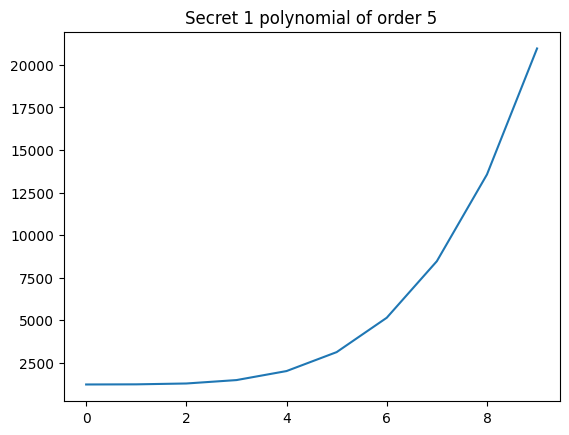

In [9]:
plt.plot(x, polynomial(x, coeff1))
plt.title(f'Secret 1 polynomial of order {len(coeff3)}')
plt.show()

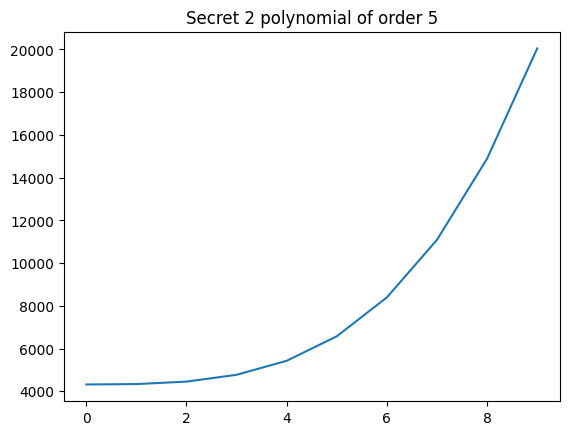

In [10]:
plt.plot(x, polynomial(x, coeff2))
plt.title(f'Secret 2 polynomial of order {len(coeff2)}')
plt.show()

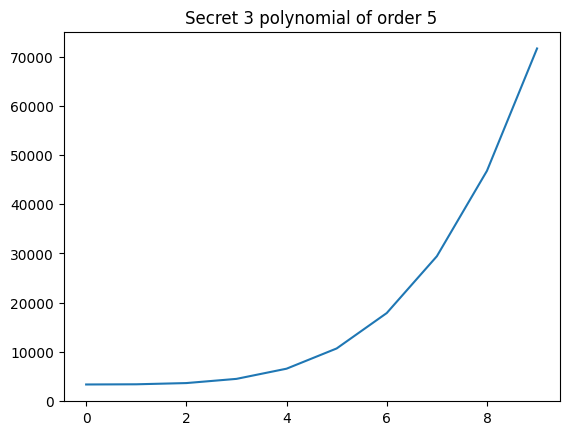

In [11]:
plt.plot(x, polynomial(x, coeff3))
plt.title(f'Secret 3 polynomial of order {len(coeff3)}')
plt.show()

In [12]:
# Server-side
def shamir_add(x, y):
    return [ (i+1, (xi[1] + yi[1]) % prime) for i, (xi, yi) in enumerate(list(zip(x, y))) ]

In [13]:
added = shamir_add(shares1, shares2)
added = shamir_add(added, shares3)

In [14]:
# Server-side
def shamir_reconstruct(shares: List[Tuple[int, int]], query_x_axis: int = 0) -> int:
    polynomial = [(p, v) for p, v in shares]
    secret = interpolate_at_point(polynomial, query_x_axis)
    return secret

In [15]:
print('points:')
added

points:


[(1, 6),
 (2, 1),
 (3, 10),
 (4, 5),
 (5, 3),
 (6, 15),
 (7, 12),
 (8, 10),
 (9, 2),
 (10, 9)]

In [16]:
for i in range(len(added)+1):
    print(f'x: {i}, y: {shamir_reconstruct(added, i)}')

x: 0, y: 13
x: 1, y: 6
x: 2, y: 1
x: 3, y: 10
x: 4, y: 5
x: 5, y: 3
x: 6, y: 15
x: 7, y: 12
x: 8, y: 10
x: 9, y: 2
x: 10, y: 9


In [17]:
print(f'secret: {shamir_reconstruct(added, 0)}')

secret: 13
